In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
import pandas as pd
pd.set_option('use_inf_as_na', True)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [39]:
data = pd.read_csv('../wisconsin/data1.csv')
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
data1=data.copy()
def classifier(data1):
    if data1["diagnosis"]=="M":
        return "1"
    else:
        return "0"
data1["diagnosis"] = data1.apply(classifier, axis=1)
data1.replace([np.inf, -np.inf], np.nan, inplace=True)
data1["diagnosis"]=pd.to_numeric(data1["diagnosis"],errors="coerce")

In [41]:
print(data1.columns,data.shape)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object') (569, 33)


B    357
M    212
Name: diagnosis, dtype: int64


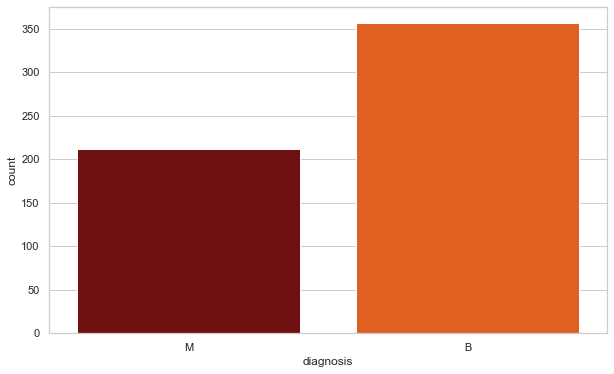

In [42]:
sns.set(style="whitegrid")
print(data['diagnosis'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('diagnosis', data=data, palette='gist_heat')
plt.show()

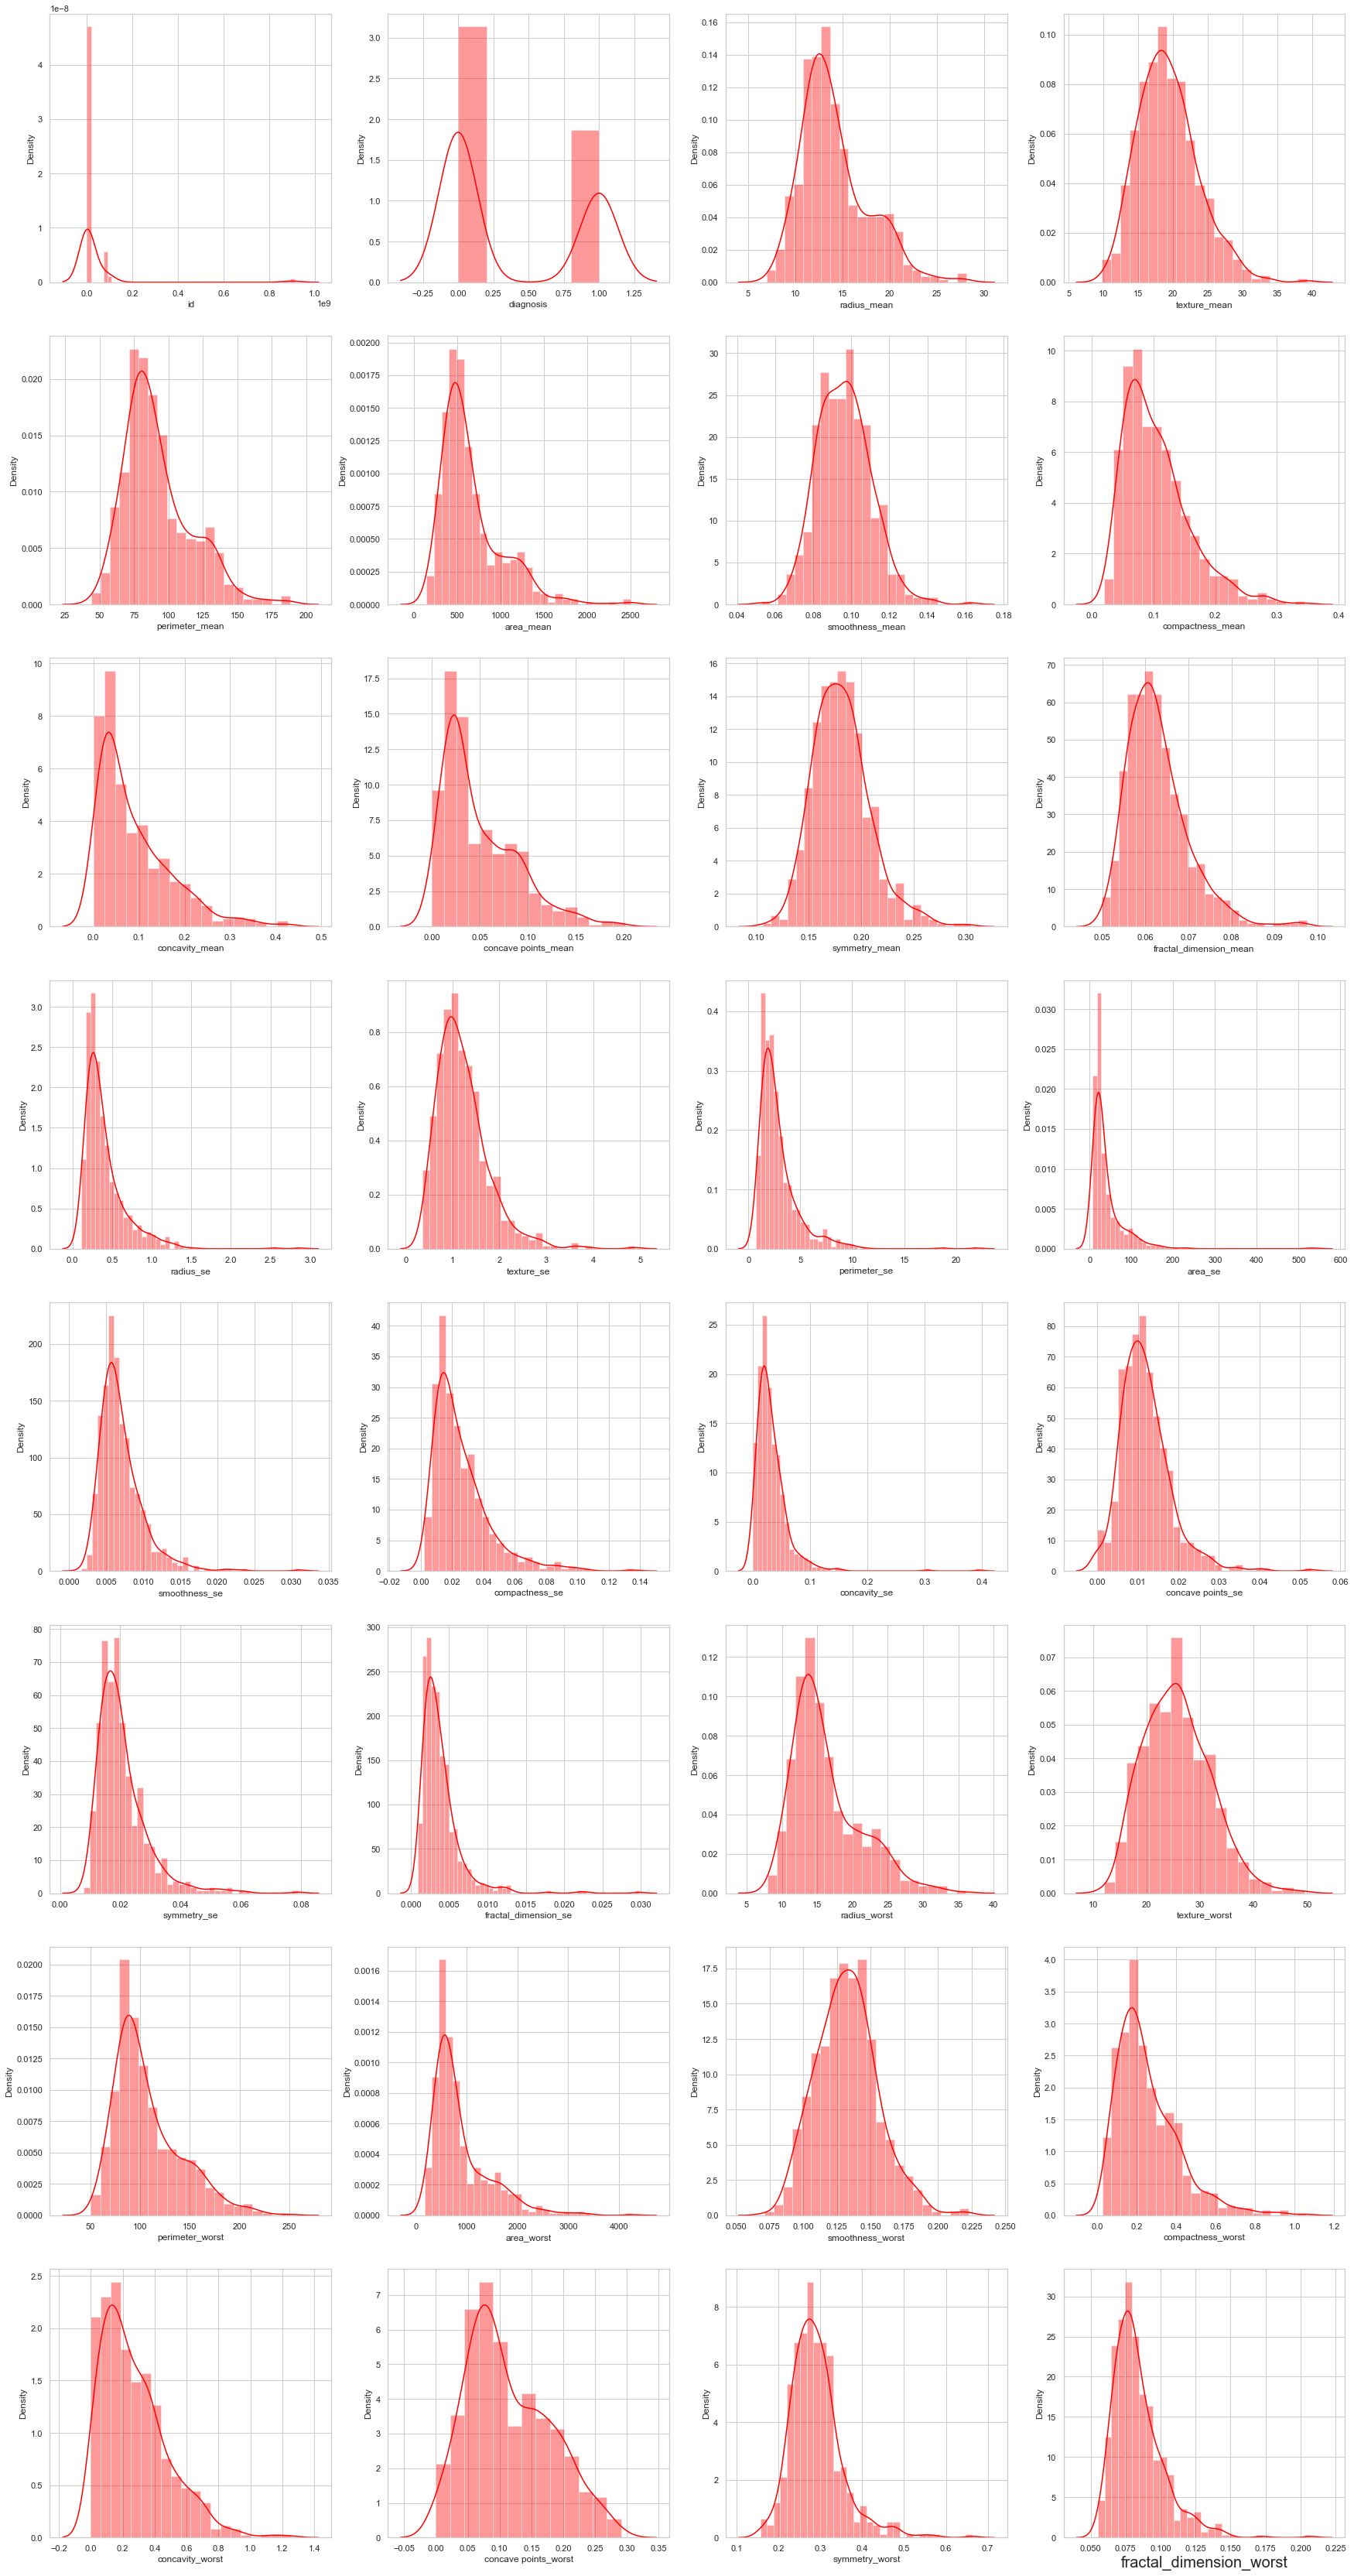

In [43]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'red')
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

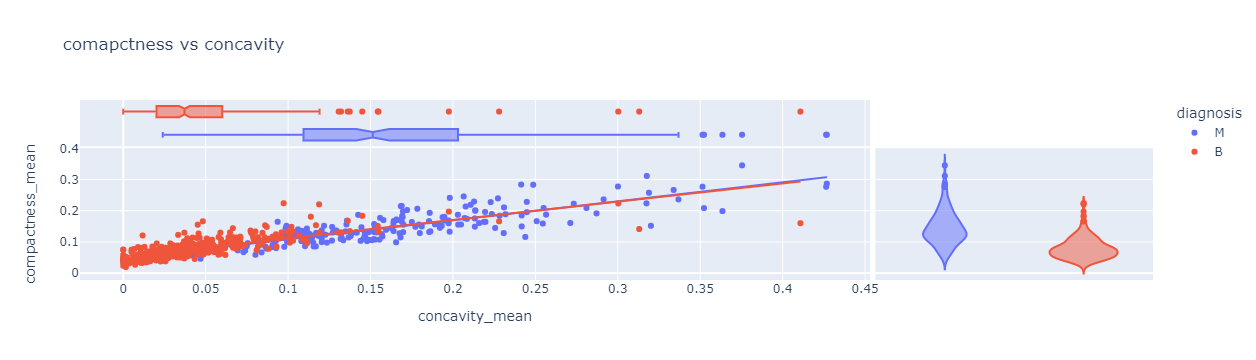

In [24]:
fig = px.scatter(data,x='concavity_mean',y='compactness_mean',color='diagnosis',marginal_x='box',trendline='ols',marginal_y='violin',
                title='comapctness vs concavity')
fig.show()

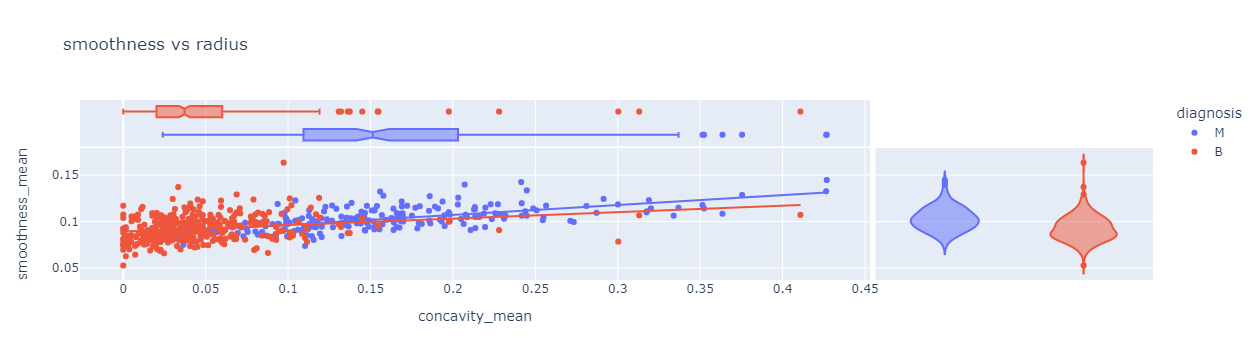

In [26]:
fig=px.scatter(data,x='concavity_mean',y='smoothness_mean',color='diagnosis',trendline='ols',marginal_x='box',marginal_y='violin',
              title='smoothness vs radius')
fig.show()

In [141]:
#Log transform
def log_transform(col):
    return np.log(col[0])

data1["compactness_mean"]=data1[["compactness_mean"]].apply(log_transform, axis=1)
data1["concavity_mean"]=data1[["concavity_mean"]].apply(log_transform, axis=1)
data1["concave points_mean"]=data1[["concave points_mean"]].apply(log_transform, axis=1)
data1["radius_se"]=data1[["radius_se"]].apply(log_transform, axis=1)
data1["perimeter_se"]=data1[["perimeter_se"]].apply(log_transform, axis=1)
data1["smoothness_se"]=data1[["smoothness_se"]].apply(log_transform, axis=1)
data1["compactness_se"]=data1[["compactness_se"]].apply(log_transform, axis=1)
data1["concavity_se"]=data1[["concavity_se"]].apply(log_transform, axis=1)
data1["symmetry_se"]=data1[["symmetry_se"]].apply(log_transform, axis=1)
data1["fractal_dimension_se"]=data1[["fractal_dimension_se"]].apply(log_transform, axis=1)
data1["area_worst"]=data1[["area_worst"]].apply(log_transform, axis=1)
data1["compactness_worst"]=data1[["compactness_worst"]].apply(log_transform, axis=1)
data1["concavity_worst"]=data1[["concavity_worst"]].apply(log_transform, axis=1)

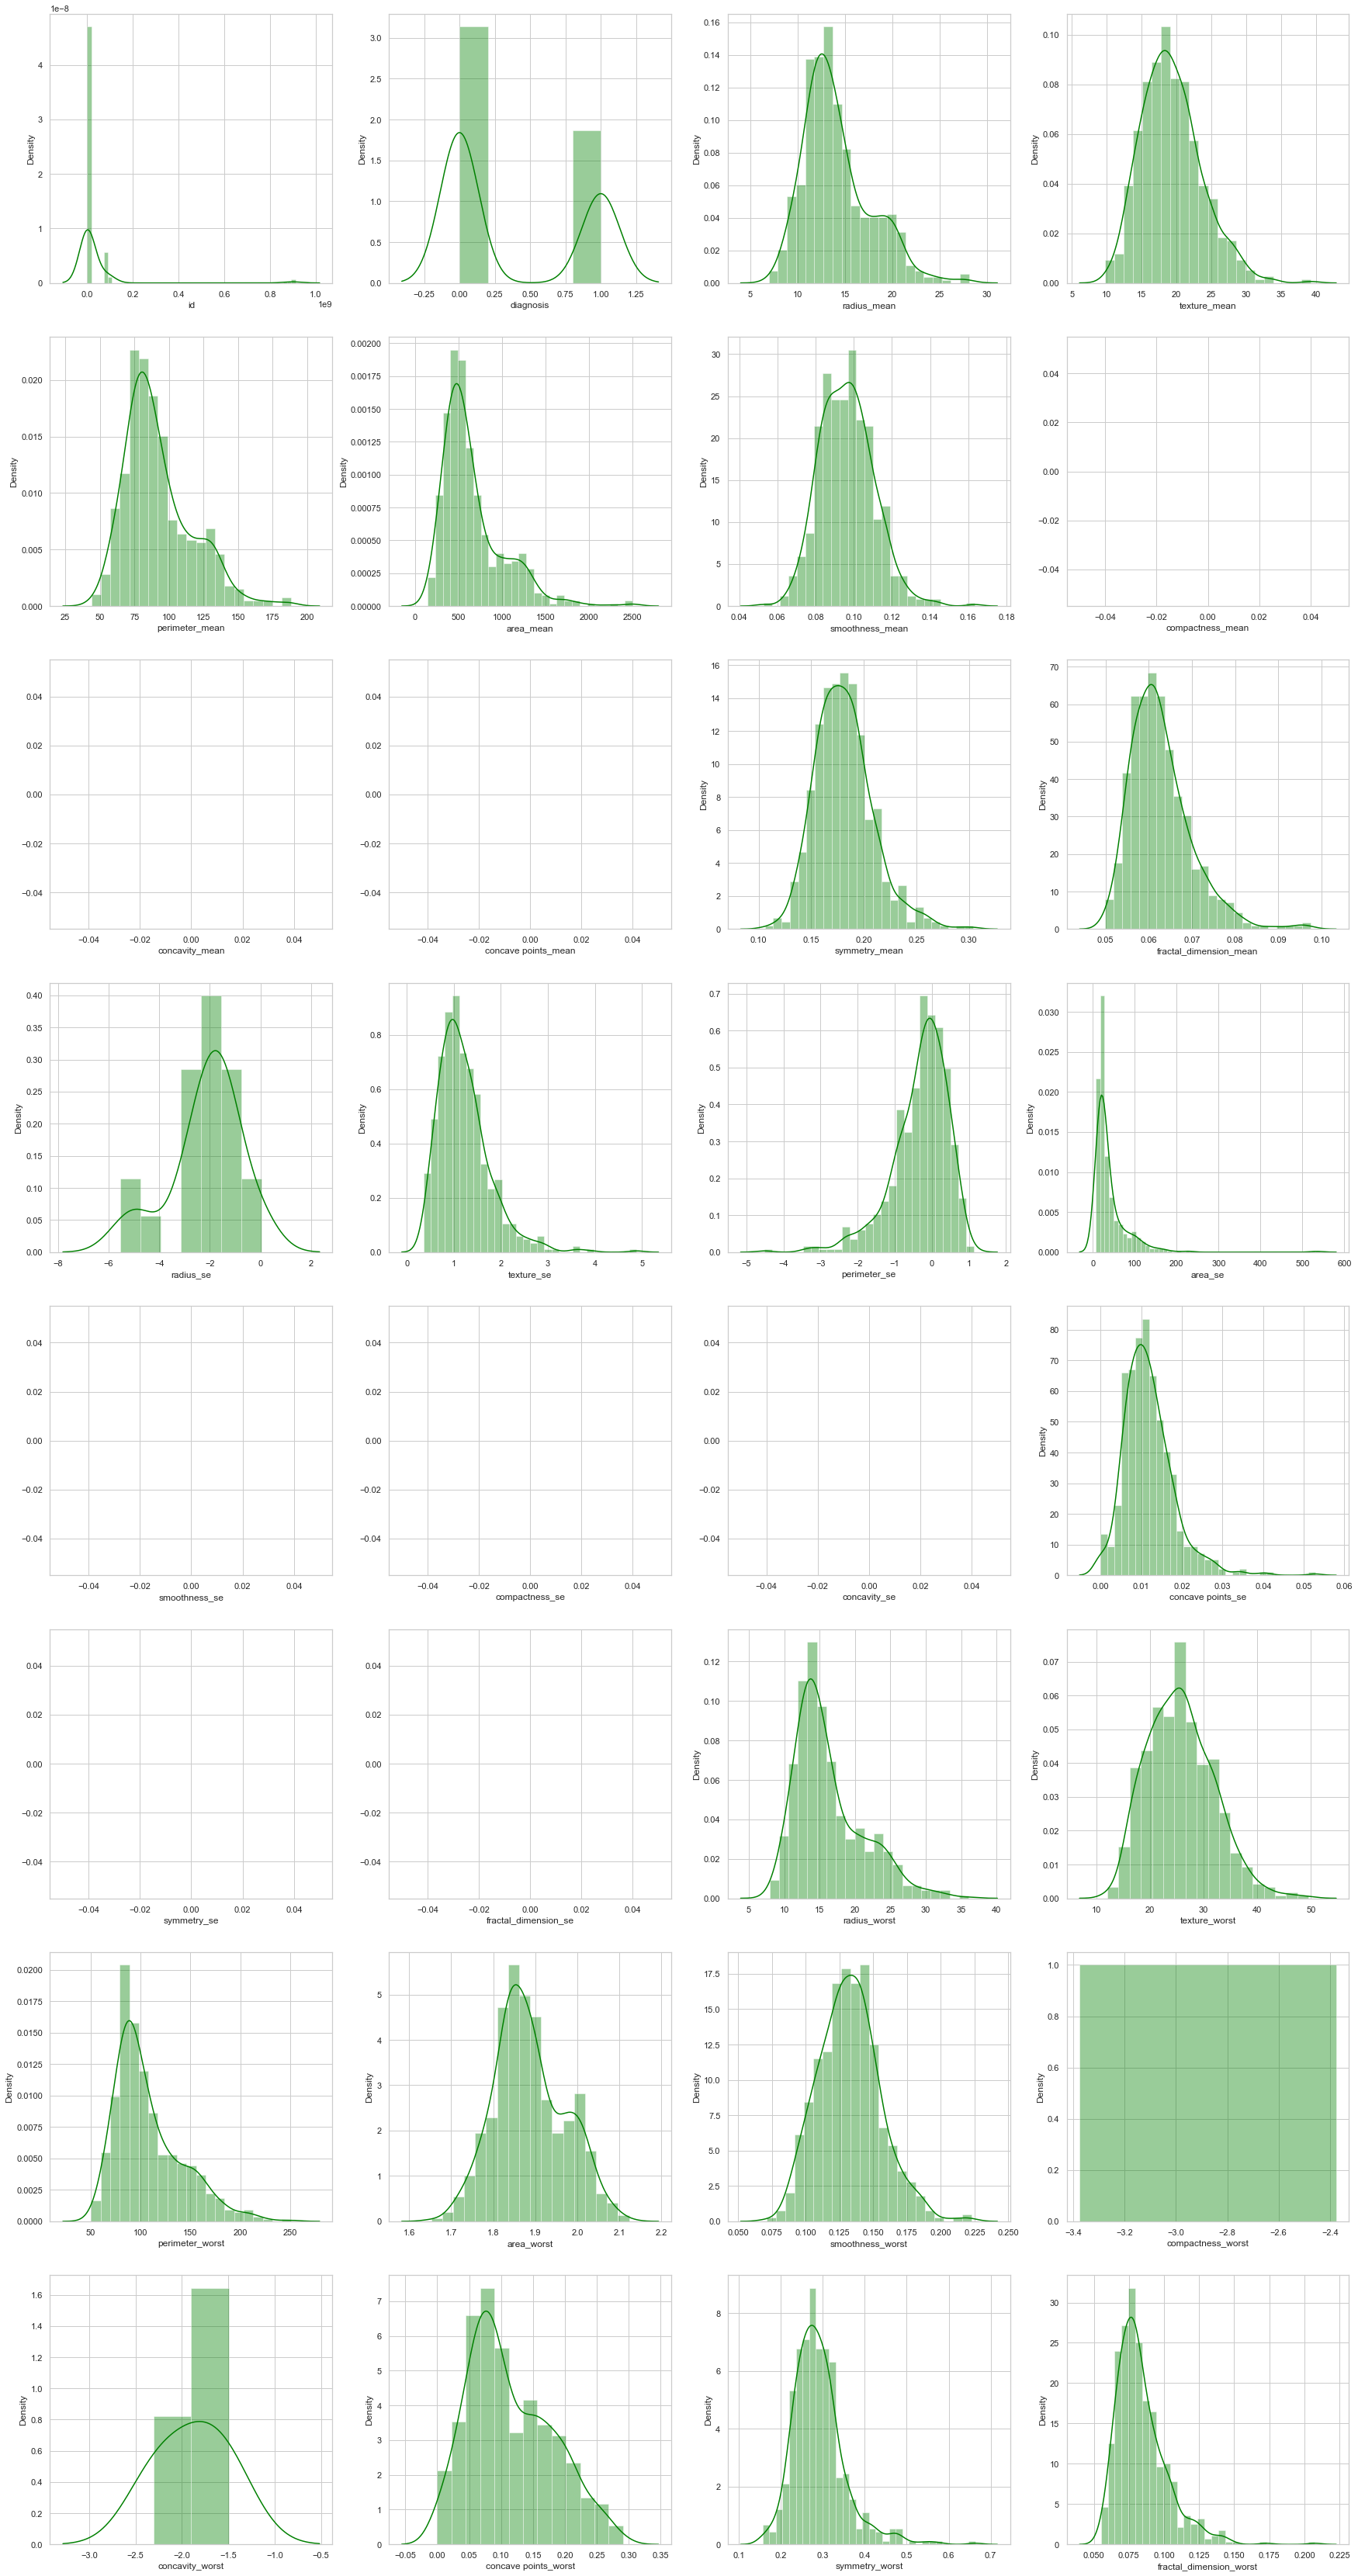

In [142]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(data1.columns)
for i in range(8):
    for j in range(4):
        sns.distplot(data1[columns[k]], ax = ax1[i][j], color = 'green')
        k += 1
plt.show()

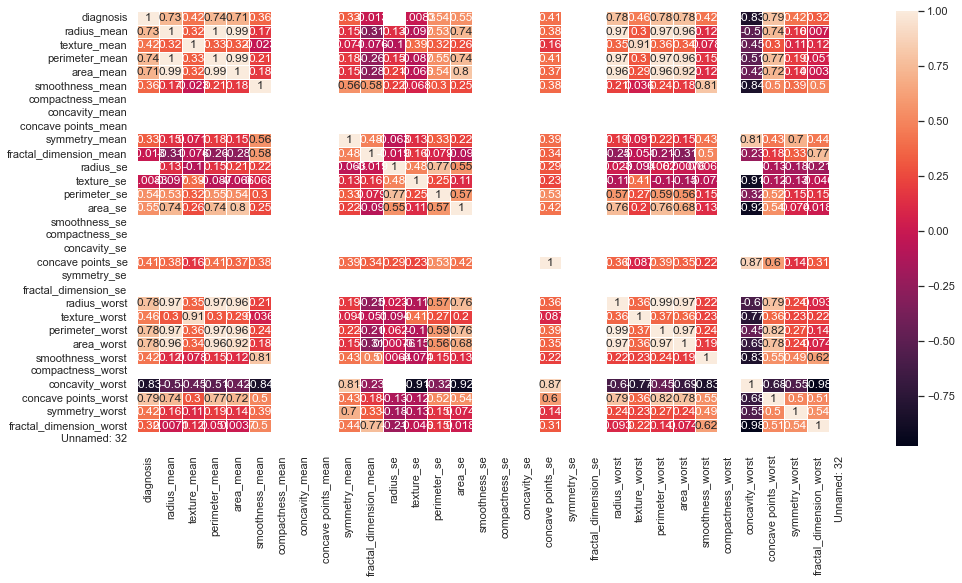

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
area_worst                 0.779129
radius_worst               0.776454
perimeter_mean             0.742636
radius_mean                0.730029
area_mean                  0.708984
area_se                    0.548236
perimeter_se               0.543235
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
id                         0.039769
texture_se                -0.008303
fractal_dimension_mean    -0.012838
concavity_worst           -0.830738
compactness_mean                NaN
concavity_mean                  NaN
concave points_mean             NaN
radius_se                       NaN
smoothness_se                   NaN
compactness_se              

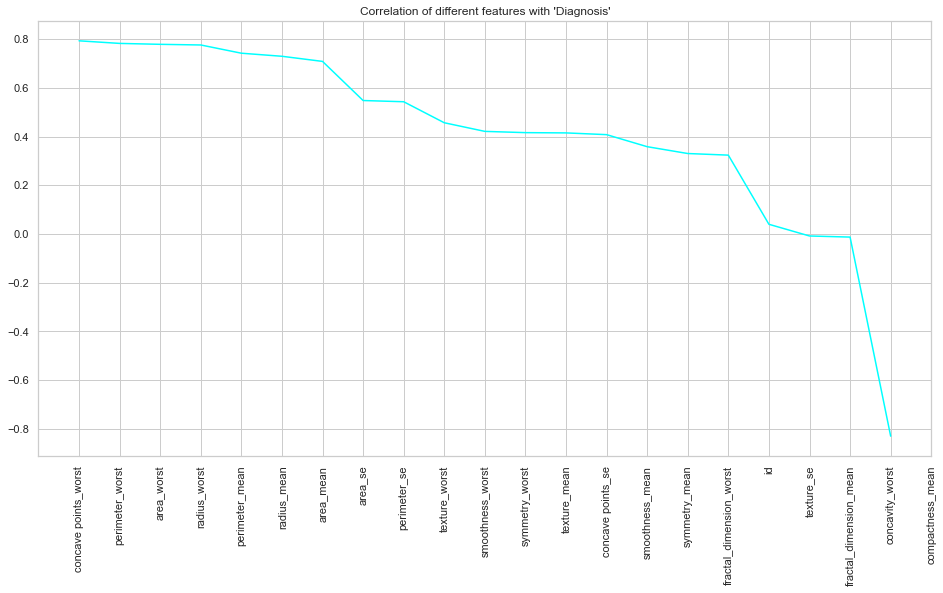

In [143]:
plt.figure(figsize=(16,8))
corr=data1.drop(["id"],axis=1).corr()
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

#Correaltion of features in descending order
print(data1.corr()['diagnosis'].sort_values(ascending=False))

plt.figure(figsize=(16,8))
plt.plot(data1.corr()['diagnosis'].sort_values(ascending=False)[1:],color="cyan")
plt.title("Correlation of different features with 'Diagnosis'")
plt.xticks(rotation=90)
plt.show()

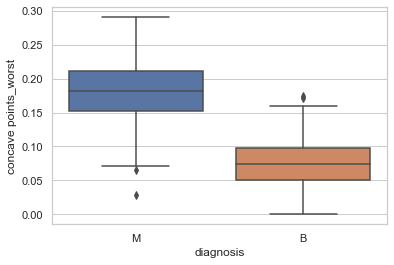

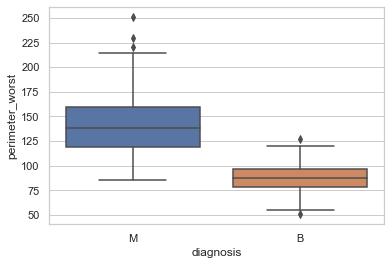

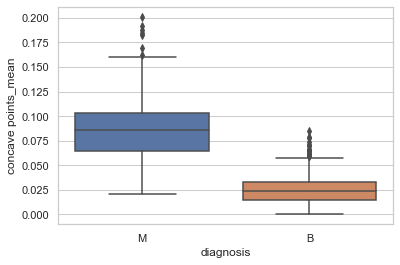

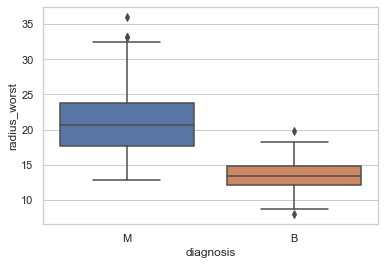

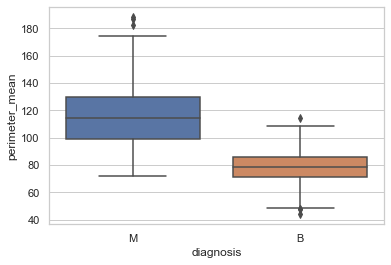

In [144]:
sns.boxplot(data=data,x="diagnosis",y="concave points_worst")
plt.show()
sns.boxplot(data=data,x="diagnosis",y="perimeter_worst")
plt.show()
sns.boxplot(data=data,x="diagnosis",y="concave points_mean")
plt.show()
sns.boxplot(data=data,x="diagnosis",y="radius_worst")
plt.show()
sns.boxplot(data=data,x="diagnosis",y="perimeter_mean")
plt.show()

In [145]:
data_M = data1[data1.diagnosis==1]     #Minority
data_B = data1[data1.diagnosis==0]     #Majority

data_M_upsampled=resample(data_M,replace=True, n_samples=300, random_state=12)
data_B_downsampled= data_B.sample(n=300).reset_index(drop=True)

#New dataset for balanced data
Balanced_df = pd.concat([data_M_upsampled, data_B_downsampled]).reset_index(drop=True)

1    300
0    300
Name: diagnosis, dtype: int64


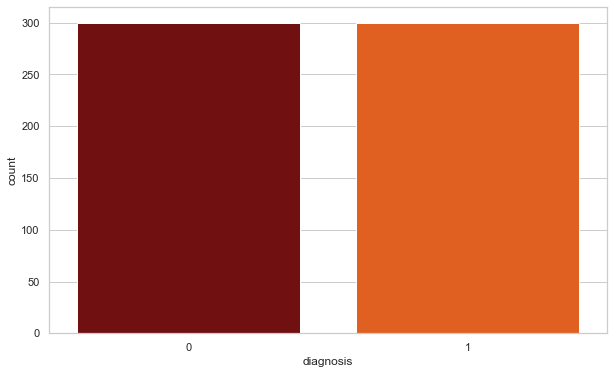

In [146]:
print(Balanced_df["diagnosis"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=Balanced_df, palette='gist_heat')
plt.show()

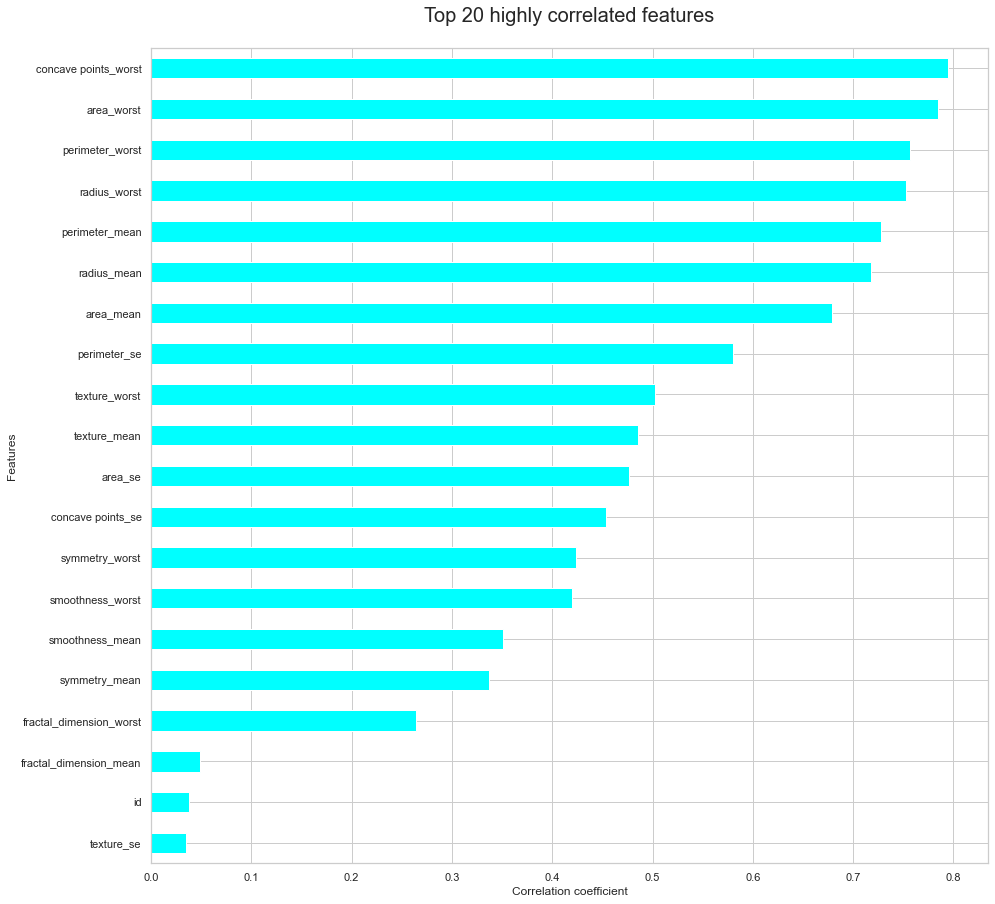

In [147]:
plt.figure(figsize=(15,15))
Balanced_df.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1].plot(kind='barh',color='cyan') 
# calculating the top 20 highest correlated features
# with respect to the target variable i.e. "quality"
plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

In [148]:
selected_features=Balanced_df.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index

X = Balanced_df[selected_features]
Y = Balanced_df.diagnosis

In [149]:
X=data.iloc[:,2:32]
Y=data.iloc[:,1]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 

#Feature Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [150]:
LR_model=LogisticRegression(random_state=0)
LR_model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [151]:
Y_pred=LR_model.predict(X_test)

Precision: 0.957 
Recall: 0.936 
F1-Score: 0.946 
Accuracy: 95.61% 



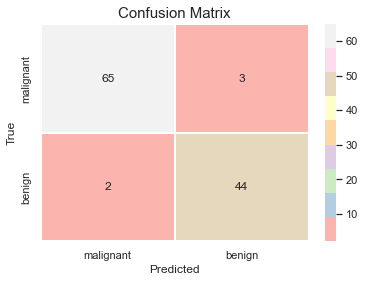

In [152]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
Logistic_Regression_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Logistic_Regression_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [153]:
svm=SVC(kernel="rbf",random_state=0)
svm.fit(X_train,Y_train)

SVC(random_state=0)

In [154]:
Y_pred=svm.predict(X_test)

Precision: 1.0 
Recall: 0.957 
F1-Score: 0.978 
Accuracy: 98.25% 



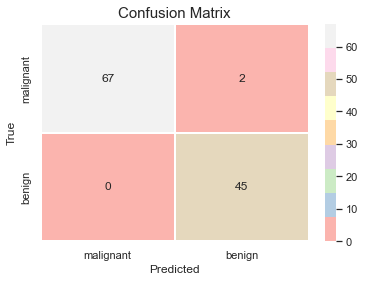

In [155]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
SVM_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), SVM_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [159]:
rfc=RandomForestClassifier(n_estimators=60,random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=60, random_state=0)

In [160]:
Y_pred=rfc.predict(X_test)

Precision: 1.0 
Recall: 0.957 
F1-Score: 0.978 
Accuracy: 98.25% 



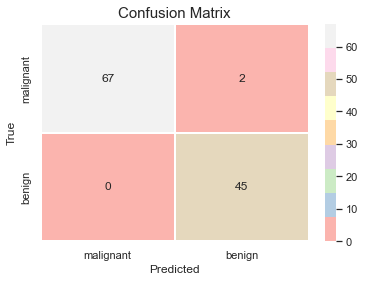

In [161]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
Random_forest_classifier_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), Random_forest_classifier_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [165]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [166]:
Y_pred=knn.predict(X_test)

Precision: 1.0 
Recall: 0.915 
F1-Score: 0.956 
Accuracy: 96.49% 



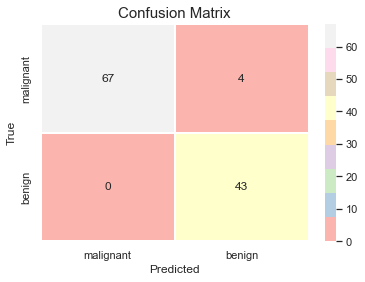

In [167]:
cm=confusion_matrix(Y_pred,Y_test)
class_label = ["malignant", "benign"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label="M", average='binary')
KNN_accuracy=round(acs(Y_test,Y_pred), 4)*100
print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), KNN_accuracy) +"% \n")

sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [168]:
val=10   #Max value of n_neighbor
model=knn  #Name of model you want to train (I'm training my KNN model)
for K in range(val):
    K_value = K+1
    model = KNeighborsClassifier(n_neighbors=K_value)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("Accuracy is : ", acs(Y_test,Y_pred)*100,"% for n_neighbors: ", K_value)

Accuracy is :  92.98245614035088 % for n_neighbors:  1
Accuracy is :  93.85964912280701 % for n_neighbors:  2
Accuracy is :  96.49122807017544 % for n_neighbors:  3
Accuracy is :  94.73684210526315 % for n_neighbors:  4
Accuracy is :  96.49122807017544 % for n_neighbors:  5
Accuracy is :  95.6140350877193 % for n_neighbors:  6
Accuracy is :  95.6140350877193 % for n_neighbors:  7
Accuracy is :  95.6140350877193 % for n_neighbors:  8
Accuracy is :  94.73684210526315 % for n_neighbors:  9
Accuracy is :  95.6140350877193 % for n_neighbors:  10


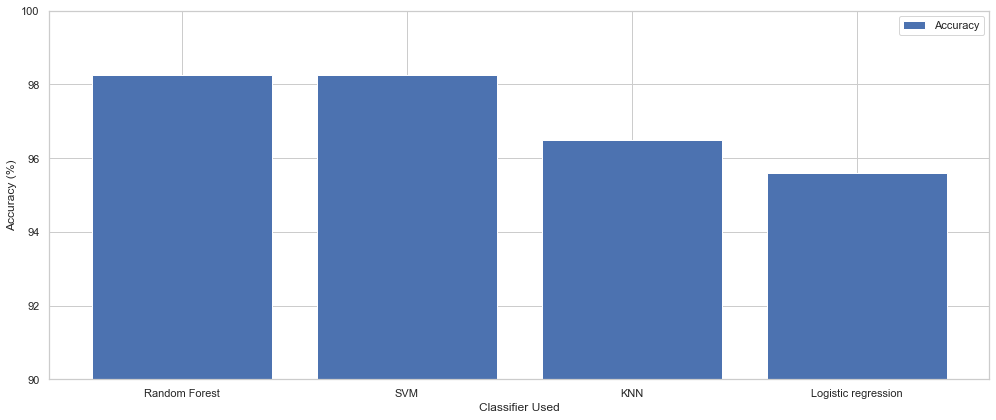

In [172]:
accuracies={"Random Forest": Random_forest_classifier_accuracy,
            "SVM": SVM_accuracy,
            "KNN": KNN_accuracy,
            "Logistic regression": Logistic_Regression_accuracy}

#Plot accuracy for different models
plt.figure(figsize=(14,6))
plt.bar(accuracies.keys(),accuracies.values(),label="Accuracy")
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy (%)")
plt.ylim(90,100)
plt.legend()
plt.tight_layout()
plt.show()